In [1]:
import pandas as pd                 # Manipular os dados
import os                           # Gerenciar arquivos no sistema operacional
import matplotlib.pyplot as plt     # Biblioteca para geração de gráficos
import seaborn as sns               # Biblioteca para gerar gráficos estilizados

# Criar variável para armazenar o caminho do diretório com os arquivos
dir_path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\'

# Criar uma lista vazia para armazenar os caminhos completos
res = []

#
for path in os.listdir(dir_path):
    # Verificar se é um arquivo válido
    if os.path.isfile(dir_path + path):
        res.append(dir_path + path)

# Criar um dataframe vazio
file_combined = pd.DataFrame()

# Estrutura para combinar os arquivos
for file in res:
    df1 = pd.read_excel(file)
    file_combined = pd.concat([file_combined,df1])


dir_final = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
fileName = 'ArquivoCombinado.xlsx'


file_combined.to_excel(dir_final + fileName)


In [2]:
# Tabela fato - Responsável por gerar os valores de análise
file_combined.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


#### Importando as tabelas dimensões (DE-PARA)

In [3]:
# Carregar a tabela Clientes

path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfClientes = pd.read_excel(path + file, sheet_name='Cliente')

dfClientes.head()

,cdCliente,Razão Social,Status,Categoria,Cidade,UF
0,1339104,Vinicius e Filipe Cantina ME,A,Cantinas,Curitiba,PR
1,1339740,Sandra e Cláudio Cantina Ltda,A,Cantinas,Curitiba,PR
2,1339884,Vera e Analu Cantina ME,A,Cantinas,Curitiba,PR
3,1340322,Emilly e Vitor Cantina Ltda,A,Cantinas,Curitiba,PR
4,4837795,Kaique e Rafaela Cantina ME,A,Cantinas,Curitiba,PR


In [4]:
# Carregar a tabela Produtos

path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfProdutos = pd.read_excel(path + file, sheet_name='Produto')

dfProdutos.head()

,cdProduto,Descrição,cdGrupo
0,1,Produto 1,9999
1,2,Produto 2,9999
2,3,Produto 3,9999
3,4,Produto 4,9999
4,5,Produto 5,9999


In [5]:
# Carregar a tabela Grupo Produto

path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfGrupoProd = pd.read_excel(path + file, sheet_name='GrupoProduto')

dfGrupoProd.head()

,cdGrupo,Grupo,Linha
0,102,Leite em Pó,Alimentos
1,103,Açúcares,Alimentos
2,104,Doces Enlatados,Alimentos
3,105,Farinhas,Alimentos
4,106,Óleos,Alimentos


In [6]:
# Carregar a tabela Clientes

path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfVendedores = pd.read_excel(path + file, sheet_name='Vendedor')

dfVendedores.head()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
0,669,Kaua Araujo,15,Fernando Silva,1,Victor Castro,Varejo
1,660,Julieta Gomes,25,Emily Rocha,1,Victor Castro,Varejo
2,183,Isabella Sousa,25,Emily Rocha,1,Victor Castro,Varejo
3,102,Gustavo Barros,25,Emily Rocha,1,Victor Castro,Varejo
4,196,Leonardo Cardoso,30,Diego Araujo,1,Victor Castro,Varejo


In [7]:
# Carregar a tabela Data

path = 'O:\\Curso Python- Big Data - Escola SENAI Suiço Brasileira\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfData = pd.read_excel(path + file, sheet_name='Data')

dfData.head()

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


Questão 02 - Qual a cobertura de clientes por ano

In [8]:
# Bloco utilizado para combinar as colunas ANO, Mês, Dia e MesNum do dataframe
# dfData, para que seja possível agregar os dados de modo a visualizar as informações
# por ano.

df_merge = file_combined.merge(dfData, # Tabela da direita (fornecedora das colunas faltantes)
                               left_on='DataEmissao', # Coluna que será utilizada como valor procaurado na tabela esq.
                               right_on='Data', # Coluna da tabela da direita que será utilizada para busca
                               how='left' # É a forma que os dados serão inseridos, ESQUERDA <--- DIRETA
                               )

df_merge.head(2)

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.6,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.4,2017-01-12,2017,Janeiro,1,12


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ano', ylabel='cdCliente'>

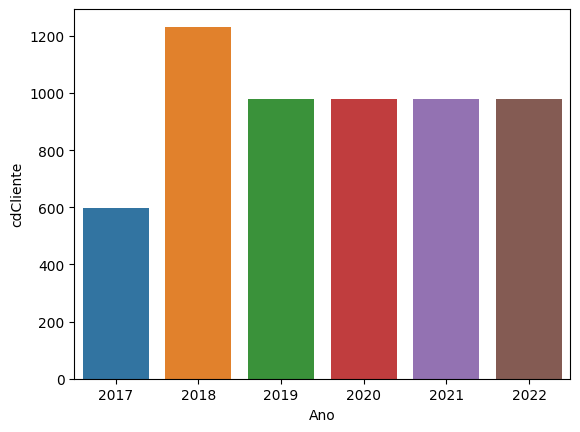

In [9]:
# Cria um novo dataframe, considerando apenas as colunas ANO e cdCliente do df_merge
df_contagem_cliente = df_merge.loc[:,['Ano','cdCliente']]

# Remover a duplicada para calcular a cobertura de clientes
# Sendo que para este cálculo é necessário eliminar os registros
# Duplicados, considera todas as colunas

df_contagem_cliente= df_contagem_cliente.drop_duplicates()

# Agrupa os dados, por meio de contagem, separando os dados
# através da coluna ANO
df_contagem_cliente = df_contagem_cliente.groupby(['Ano']).count()


sns.barplot(
            x = df_contagem_cliente.index, 
            y ='cdCliente',
            data = df_contagem_cliente
            )

#### Questões 03 - Peso líquido total vendidos por ano?

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '414.819'),
 Text(0, 0, '658.505'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656')]

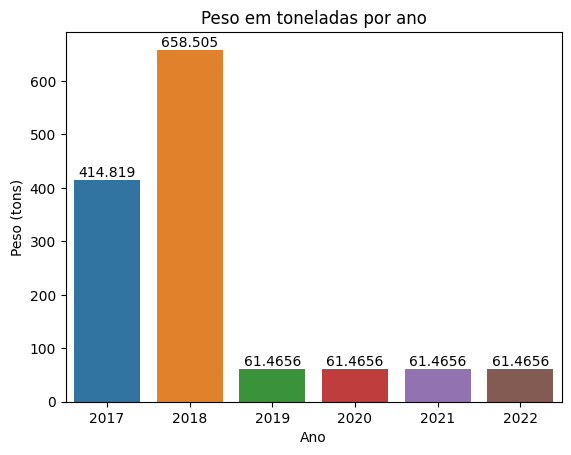

In [18]:
# Criando um novo dataframe com as colunas Ano e Peso Líquido
df_peso_ano = df_merge.loc[:,['Ano','Peso Líquido']]

#
df_peso_ano = df_peso_ano.groupby('Ano').sum()

df_peso_ano['Peso_tons'] = df_peso_ano['Peso Líquido']/1000


# Gerar o gráfico de barras ANO x PESO TONELADAS
graficos = sns.barplot(
                        x = df_peso_ano.index, 
                        y = df_peso_ano['Peso_tons']
                        )

# Título do gráfico
plt.title('Peso em toneladas por ano')

# Título no eixo Y
plt.ylabel('Peso (tons)')

# Título no eixo X
plt.xlabel('Ano')

# Rótulo nas colunas do gráfico
graficos.bar_label(graficos.containers[0])

#### Questão 04. Qual é Total de Faturamento da Super Atacadista em todo o período?

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ano', ylabel='subtotal'>

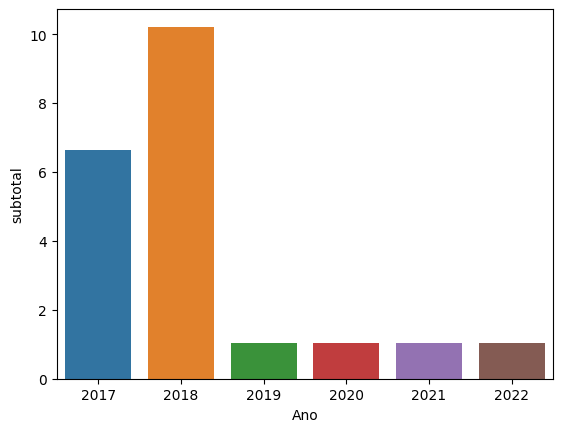

In [32]:
df_fat = df_merge.loc[:,['Ano','QtdItens','ValorUnitario']]

# Adicionando a coluna Subtotal
df_fat['subtotal'] = df_fat['QtdItens'] * df_fat['ValorUnitario']

# Calcular o total vendido no período
df_fat = df_fat.loc[:,['Ano','subtotal']]

df_fat = df_fat.groupby('Ano').sum() / (10 ** 6)

# Criando o gráfico de colunas
sns.barplot(x = df_fat.index, y = df_fat['subtotal'])


### Questão 07 - Quantos clientes ativos e inativos temos em nossa empresa?

([<matplotlib.patches.Wedge at 0x221b4dc9dd0>,
 [Text(-1.0939826195114473, 0.11490007922918268, 'Ativo'),
  Text(1.093982623545592, -0.11490004081941627, 'Inativo')],
 [Text(-0.5967177924607893, 0.06267277048864509, '97%'),
  Text(0.596717794661232, -0.0626727495378634, '3%')])

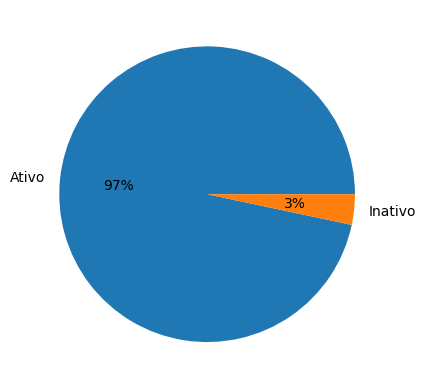

In [46]:
# Selecionando as colunas cdCliente e Status do
# dataframe dfClientes.

dfClientes_resumo = dfClientes.loc[:,['cdCliente','Status']]

# Substituir os valores na coluna status
# A - Ativo | I - Inativo

dfClientes_resumo['Status'] = dfClientes_resumo['Status'].replace('A','Ativo')
dfClientes_resumo['Status'] = dfClientes_resumo['Status'].replace('I','Inativo')

# Agrupar os dados por Inativo e Ativo

dfClientes_resumo = dfClientes_resumo.groupby('Status').count()

# Gráfico de Pizza
plt.pie(
        dfClientes_resumo['cdCliente'], # Valores do gráfico
        labels=dfClientes_resumo.index, # Rótulos de dados
        autopct='%.0f%%'                # Exibir os valores em porcentagem
)

#### Questão 06 - Qual foi o total de peso em toneladas dos produtos vendidos em todo o período?

In [48]:
# Seleciona a coluna Peso Líquido e realiza soma deste valor
# e converte o total em toneladas

peso_vendido = file_combined['Peso Líquido'].sum() / 1000

# Trata a quantidade de casas decimais, ajustando para 2 casas
# após a vírgula

peso_vendido = round(peso_vendido,2)

print(f'O peso total vendido foi de {peso_vendido} toneladas.')

O peso total vendido foi de 1319.19 toneladas.


##### Questão 08 - Qual foi o ano com maior ticket médio dos produtos?
(Ticket médio = Total faturado pela quantidade vendida)

In [61]:
#Seleção das colunas Ano, QtdeItens e Valor Unitário
df_ticket = df_merge.loc[:,['Ano','QtdItens','ValorUnitario']]

# Adicionar a coluna Valor Total
df_ticket['ValorTotal'] = df_ticket['QtdItens'] * df_ticket['ValorUnitario']

# Selecionar as colunas de interesse
df_ticket = df_ticket.loc[:,['Ano','QtdItens','ValorTotal']]

# Agrupar os campos QtdeItens e ValorTotal por Ano
df_ticket = df_ticket.groupby('Ano').sum()

# Adicionar a coluna Ticket Médio, com base no cálculo 
# Valor total / Qtde Itens por ano
df_ticket['Ticket Medio'] = df_ticket['ValorTotal'] / df_ticket['QtdItens']



,QtdItens,ValorTotal,Ticket Medio
Ano,,,
2017,2167345,6648222.05,3.067450
2018,3864838,10214809.43,2.643011
2019,348989,1046201.01,2.997805
2020,348989,1046201.01,2.997805
2021,348989,1046201.01,2.997805
2022,348989,1046201.01,2.997805
